In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sqlite3
%matplotlib inline

import os


In [2]:
cnx = sqlite3.connect('./data.db')

original_songs = pd.read_sql_query("SELECT * FROM songs", cnx)
original_genres = pd.read_sql_query("SELECT * FROM genres", cnx)

artists = pd.read_sql_query("SELECT * FROM artist", cnx)

characteristics = pd.read_sql_query("SELECT * FROM characteristics", cnx)

new_genres = pd.read_csv('df_genres2.csv')
new_songs = pd.read_csv('df_songs2.csv')

In [3]:
df_ori = original_songs.merge(original_genres).merge(characteristics).merge(artists)
df_new = new_songs.merge(new_genres).merge(characteristics).merge(artists)

In [4]:
df_ori.head(2)

,song_id,title,year,artist_id,genre_id,genre_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity,artist_name
0,0,Sunrise,2004,0,0,adult standards,157,30,53,-14,11,68,201,94,3,71,Norah Jones
1,33,Don't Know Why,2002,0,0,adult standards,88,20,73,-12,7,62,186,88,3,74,Norah Jones


In [5]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   song_id       1994 non-null   int64 
 1   title         1994 non-null   object
 2   year          1994 non-null   int64 
 3   artist_id     1994 non-null   int64 
 4   genre_id      1994 non-null   int64 
 5   genre_name    1994 non-null   object
 6   bpm           1994 non-null   int64 
 7   energy        1994 non-null   int64 
 8   danceability  1994 non-null   int64 
 9   db            1994 non-null   int64 
 10  liveness      1994 non-null   int64 
 11  valence       1994 non-null   int64 
 12  length        1994 non-null   int64 
 13  acousticness  1994 non-null   int64 
 14  speechiness   1994 non-null   int64 
 15  popularity    1994 non-null   int64 
 16  artist_name   1994 non-null   object
dtypes: int64(14), object(3)
memory usage: 280.4+ KB


In [6]:
df_ori.describe()

,song_id,year,artist_id,genre_id,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,996.500000,1992.992979,295.808425,27.734704,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,262.443330,28.858074,4.994985,59.52658
std,575.762538,16.116048,211.499699,35.359856,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,93.604387,29.011986,4.401566,14.35160
min,0.000000,1956.000000,0.000000,0.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,93.000000,0.000000,2.000000,11.00000
25%,498.250000,1979.000000,90.000000,1.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,212.000000,3.000000,3.000000,49.25000
50%,996.500000,1993.000000,289.500000,13.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,245.000000,18.000000,4.000000,62.00000
75%,1494.750000,2007.000000,458.750000,40.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,289.000000,50.000000,5.000000,71.00000
max,1993.000000,2019.000000,730.000000,148.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,1412.000000,99.000000,55.000000,100.00000


#### Goal: explore The relationship between Genres and Popularity 

In [7]:
df_ori['genre_name'].nunique()

149

In [8]:
df_ori['genre_name'].unique()

array(['adult standards', 'album rock', 'alternative hip hop',
       'alternative metal', 'classic rock', 'alternative pop rock', 'pop',
       'modern rock', 'detroit hip hop', 'alternative rock',
       'dutch indie', 'garage rock', 'dutch cabaret', 'permanent wave',
       'classic uk pop', 'dance pop', 'modern folk rock', 'dutch pop',
       'dutch americana', 'alternative dance', 'german pop', 'afropop',
       'british soul', 'irish rock', 'disco', 'big room', 'art rock',
       'danish pop rock', 'neo mellow', 'britpop', 'boy band',
       'carnaval limburg', 'arkansas country', 'latin alternative',
       'british folk', 'celtic', 'chanson', 'celtic rock', 'hip pop',
       'east coast hip hop', 'dutch rock', 'blues rock', 'electro',
       'australian pop', 'belgian rock', 'downtempo', 'reggae fusion',
       'british invasion', 'finnish metal', 'canadian pop', 'bow pop',
       'dutch hip hop', 'dutch metal', 'soft rock', 'acoustic pop',
       'acid jazz', 'dutch prog', 'ca

In [9]:
print(f"oldest: {df_ori['year'].min()} recent: {df_ori['year'].max()}")

oldest: 1956 recent: 2019


In [10]:
print('range: ' ,df_ori['year'].max() - df_ori['year'].min())

range:  63


In [11]:
labels = '55-65 65-76 75-83 83-92 92-01 01-10 10-19'.split()
df_ori['decade_group'] = pd.cut(df_ori['year'],bins=7,labels=labels)
df_ori['decade_group'].unique()

['01-10', '10-19', '65-76', '92-01', '55-65', '75-83', '83-92']
Categories (7, object): ['55-65' < '65-76' < '75-83' < '83-92' < '92-01' < '01-10' < '10-19']

In [12]:
df_ori_group = df_ori.groupby(['decade_group','genre_name'],as_index=False).mean()\
.sort_values(by=['decade_group','popularity'], ascending=[True,False]).dropna()


df_ori_group

,decade_group,genre_name,song_id,year,artist_id,genre_id,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
61,55-65,classic rock,1839.000000,1964.000000,394.000000,4.0,107.000000,22.000000,53.000000,-14.000000,11.000000,33.000000,185.000000,84.000000,3.000000,75.000000
34,55-65,blues rock,1991.000000,1959.000000,728.000000,41.0,168.000000,80.000000,53.000000,-9.000000,31.000000,97.000000,162.000000,74.000000,7.000000,74.000000
40,55-65,british invasion,1847.111111,1964.333333,113.000000,47.0,127.888889,56.111111,53.000000,-9.888889,9.444444,69.888889,149.555556,42.333333,3.666667,71.222222
2,55-65,adult standards,1896.833333,1960.944444,349.611111,0.0,117.111111,35.666667,46.222222,-12.111111,17.388889,54.666667,181.388889,71.000000,4.666667,68.000000
28,55-65,bebop,1992.000000,1959.000000,729.000000,148.0,174.000000,26.000000,45.000000,-13.000000,7.000000,60.000000,324.000000,54.000000,4.000000,65.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,10-19,compositional ambient,679.000000,2016.000000,345.000000,104.0,105.000000,24.000000,61.000000,-17.000000,25.000000,37.000000,290.000000,76.000000,3.000000,28.000000
1039,10-19,streektaal,690.000000,2017.000000,349.000000,106.0,98.000000,21.000000,61.000000,-20.000000,8.000000,42.000000,274.000000,60.000000,3.000000,28.000000
918,10-19,austropop,767.000000,2018.000000,376.000000,113.0,93.000000,84.000000,64.000000,-8.000000,21.000000,89.000000,216.000000,42.000000,4.000000,26.000000
1011,10-19,italian pop,713.000000,2017.000000,357.000000,107.0,125.000000,40.000000,50.000000,-9.000000,12.000000,15.000000,225.000000,34.000000,3.000000,25.000000


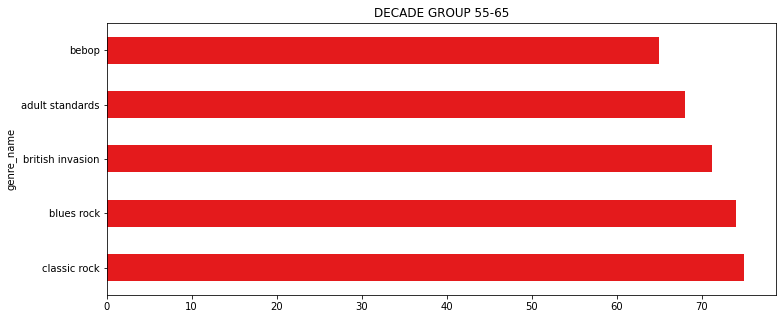

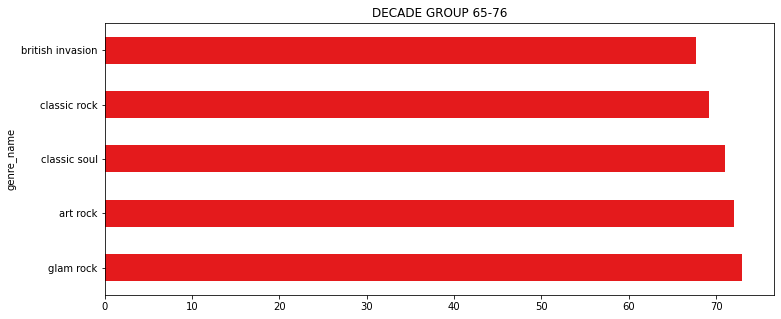

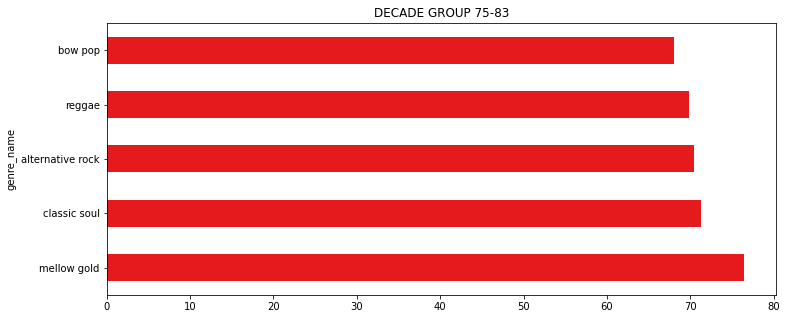

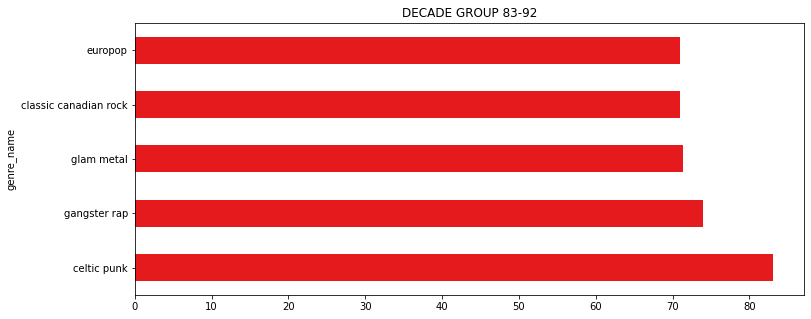

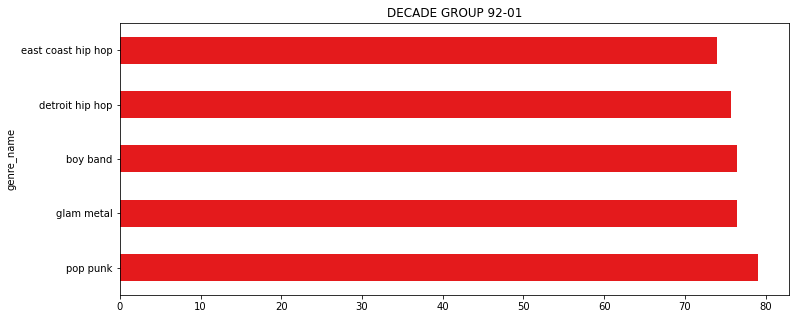

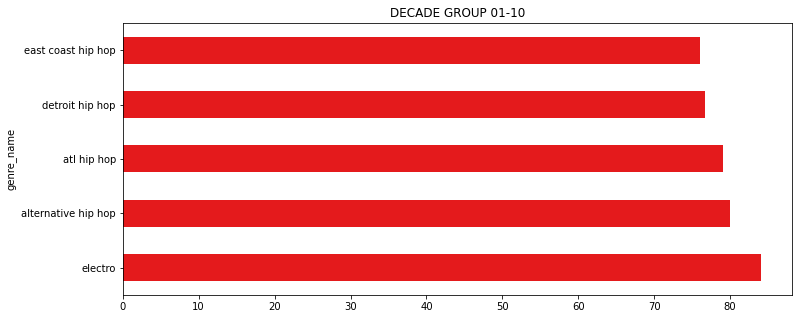

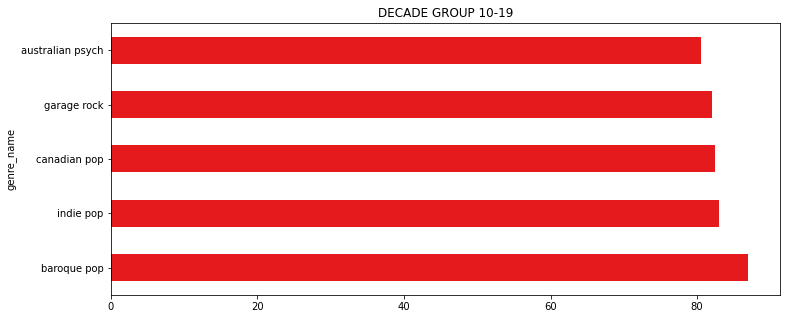

In [13]:
for i in df_ori_group['decade_group'].unique():
    temp = df_ori_group[df_ori_group['decade_group'] == i].sort_values(by='popularity',ascending=False)
    
    
    temp.head().plot.barh(x='genre_name', y='popularity', colormap='Set1',legend=False,figsize=(12, 5),title=f"DECADE GROUP {i}")
 
    plt.show()


In [14]:
total_rock = 0
for i in df_ori['genre_name'].unique():
    if 'rock' in i:
        print(i)
        total_rock +=1
print(f'\nrock appeared {total_rock} times in genres')

album rock
classic rock
alternative pop rock
modern rock
alternative rock
garage rock
modern folk rock
irish rock
art rock
danish pop rock
celtic rock
dutch rock
blues rock
belgian rock
soft rock
dance rock
australian rock
rock-and-roll
glam rock
hard rock
australian alternative rock
yacht rock
classic canadian rock
classical rock
canadian rock
german pop rock
british alternative rock
german alternative rock

rock appeared 28 times in genres


In [15]:
for i in df_ori['genre_name'].unique():
    if len(i.split()) > 1:
        print(i)

adult standards
album rock
alternative hip hop
alternative metal
classic rock
alternative pop rock
modern rock
detroit hip hop
alternative rock
dutch indie
garage rock
dutch cabaret
permanent wave
classic uk pop
dance pop
modern folk rock
dutch pop
dutch americana
alternative dance
german pop
british soul
irish rock
big room
art rock
danish pop rock
neo mellow
boy band
carnaval limburg
arkansas country
latin alternative
british folk
celtic rock
hip pop
east coast hip hop
dutch rock
blues rock
australian pop
belgian rock
reggae fusion
british invasion
finnish metal
canadian pop
bow pop
dutch hip hop
dutch metal
soft rock
acoustic pop
acid jazz
dutch prog
candy pop
operatic pop
scottish singer-songwriter
mellow gold
alternative pop
dance rock
atl hip hop
canadian folk
big beat
art pop
uk pop
glam metal
brill building pop
g funk
happy hardcore
belgian pop
classic schlager
contemporary country
barbadian pop
chamber pop
british singer-songwriter
indie pop
australian rock
australian indie fo

In [16]:
def genre_colaspe(genre_att):
    genres = 'rock metal pop jazz soul blues punk country folk funk\
    rap house dance dutch indie singer-songwriter latin reggae'.split()
    genres.append('hip hop')
    #print(genres)
    
    for genre in genres:
        if genre in genre_att:
            return genre
    return genre_att


In [17]:
df_ori2 = df_ori.copy()
df_ori2['genre_name'] = df_ori['genre_name'].apply(genre_colaspe)

In [18]:
df_ori['genre_name'].nunique()

149

In [19]:
df_ori2['genre_name'].nunique()

53

In [20]:
df_ori['genre_name'].unique()

array(['adult standards', 'album rock', 'alternative hip hop',
       'alternative metal', 'classic rock', 'alternative pop rock', 'pop',
       'modern rock', 'detroit hip hop', 'alternative rock',
       'dutch indie', 'garage rock', 'dutch cabaret', 'permanent wave',
       'classic uk pop', 'dance pop', 'modern folk rock', 'dutch pop',
       'dutch americana', 'alternative dance', 'german pop', 'afropop',
       'british soul', 'irish rock', 'disco', 'big room', 'art rock',
       'danish pop rock', 'neo mellow', 'britpop', 'boy band',
       'carnaval limburg', 'arkansas country', 'latin alternative',
       'british folk', 'celtic', 'chanson', 'celtic rock', 'hip pop',
       'east coast hip hop', 'dutch rock', 'blues rock', 'electro',
       'australian pop', 'belgian rock', 'downtempo', 'reggae fusion',
       'british invasion', 'finnish metal', 'canadian pop', 'bow pop',
       'dutch hip hop', 'dutch metal', 'soft rock', 'acoustic pop',
       'acid jazz', 'dutch prog', 'ca

In [21]:
df_ori2['genre_name'].unique()

array(['adult standards', 'rock', 'hip hop', 'metal', 'pop', 'dutch',
       'permanent wave', 'dance', 'soul', 'disco', 'big room',
       'neo mellow', 'boy band', 'carnaval limburg', 'country', 'latin',
       'folk', 'celtic', 'chanson', 'electro', 'downtempo', 'reggae',
       'british invasion', 'jazz', 'trance', 'singer-songwriter',
       'mellow gold', 'blues', 'big beat', 'funk', 'happy hardcore',
       'classic schlager', 'gabba', 'edm', 'electronica', 'indie',
       'stomp and holler', 'australian psych', 'laboratorio',
       'classic soundtrack', 'compositional ambient', 'streektaal', 'ccm',
       'house', 'australian americana', 'j-core', 'punk', 'basshall',
       'christelijk', 'levenslied', 'rap', 'motown', 'bebop'],
      dtype=object)

In [22]:
labels = '55-65 65-76 75-83 83-92 92-01 01-10 10-19'.split()
df_new['decade_group'] = pd.cut(df_ori['year'],bins=7,labels=labels)
df_new['decade_group'].unique()

['01-10', '10-19', '65-76', '92-01', '55-65', '75-83', '83-92']
Categories (7, object): ['55-65' < '65-76' < '75-83' < '83-92' < '92-01' < '01-10' < '10-19']

In [23]:
df_new_group = df_new.groupby(['decade_group','genre_name'],as_index=False).mean()\
.sort_values(by=['decade_group','popularity'], ascending=[True,False]).dropna()


df_new_group

,decade_group,genre_name,song_id,year,artist_id,genre_id,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
0,55-65,adult standards,1896.833333,1960.944444,349.611111,0.0,117.111111,35.666667,46.222222,-12.111111,17.388889,54.666667,181.388889,71.000000,4.666667,68.000000
16,55-65,rock,575.500000,2003.750000,135.250000,1.0,121.833333,72.000000,43.083333,-6.916667,26.583333,44.750000,251.500000,14.333333,3.833333,59.333333
14,55-65,pop,1457.000000,1988.500000,572.500000,4.0,140.250000,47.250000,45.500000,-7.750000,15.250000,30.000000,291.500000,41.500000,3.250000,52.250000
6,55-65,dutch,552.100000,2003.700000,110.500000,5.0,108.800000,35.800000,46.600000,-11.400000,21.400000,36.900000,214.600000,65.100000,4.100000,38.500000
31,65-76,permanent wave,622.000000,2015.000000,16.000000,6.0,90.000000,74.000000,49.000000,-5.000000,30.000000,36.000000,259.000000,26.000000,4.000000,78.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,10-19,pop,764.062992,2003.228346,221.039370,4.0,123.039370,60.070866,56.826772,-8.102362,16.992126,48.299213,256.929134,29.141732,5.086614,56.551181
110,10-19,british invasion,792.583333,1992.166667,135.000000,14.0,103.500000,47.416667,55.916667,-10.250000,32.000000,58.750000,198.916667,52.083333,3.500000,54.166667
108,10-19,adult standards,620.750000,2014.750000,238.000000,0.0,121.250000,47.000000,39.000000,-7.250000,17.000000,35.250000,238.750000,65.250000,3.500000,50.250000
114,10-19,dutch,925.333333,2004.500000,194.466667,5.0,120.333333,50.833333,54.200000,-10.033333,25.266667,46.266667,233.800000,42.233333,5.466667,45.700000


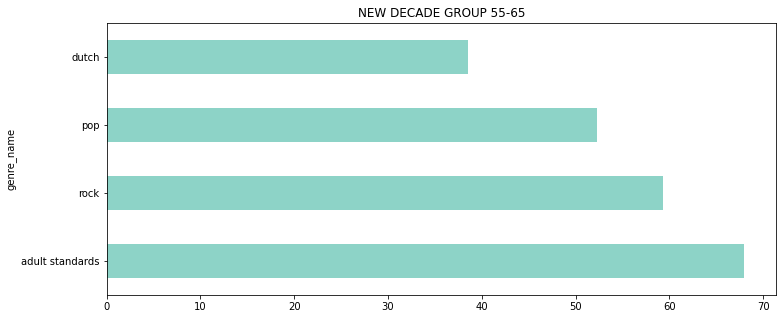

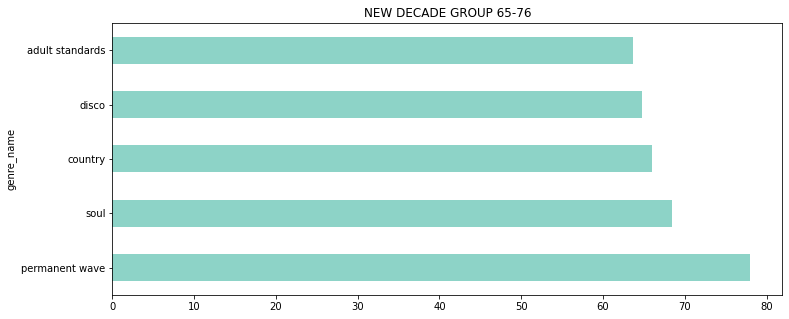

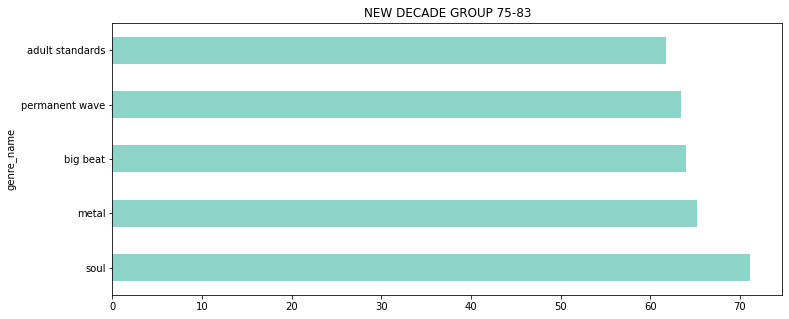

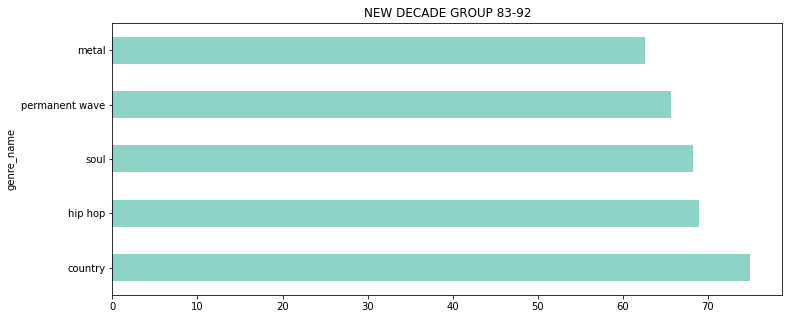

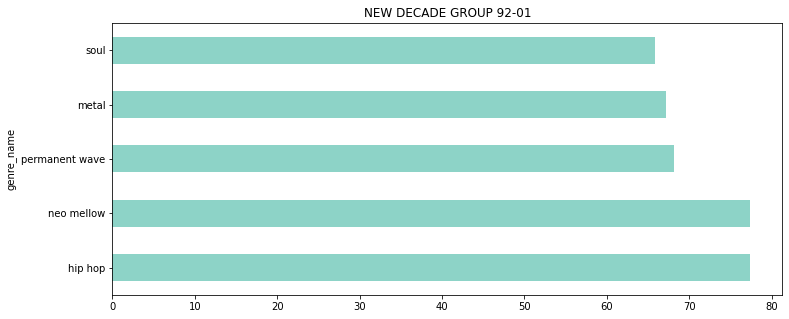

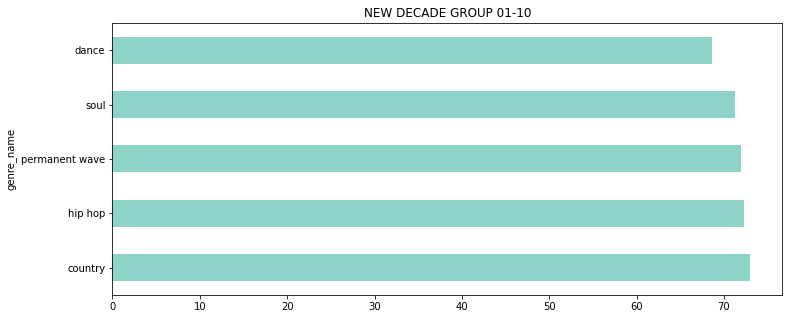

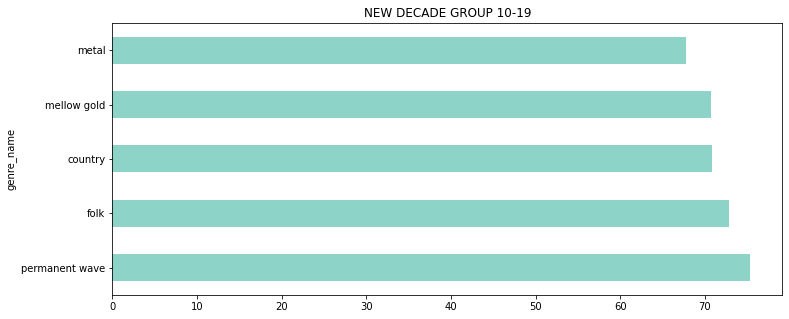

In [24]:
for i in df_new_group['decade_group'].unique():
    temp = df_new_group[df_new_group['decade_group'] == i].sort_values(by='popularity',ascending=False)
    # print(temp['popularity'])
    
    temp.head().plot.barh(x='genre_name',y='popularity', colormap='Set3',legend=False,figsize=(12, 5),title=f"NEW DECADE GROUP {i}")
 
    plt.show()
